In [73]:
import numpy as np
import miditoolkit
from tqdm import tqdm
import pandas as pd

def corrections(note_lengths,L):
    note_lengths=np.array(note_lengths)
    l=np.array(note_lengths/L)
    f=np.array(np.modf(l)[0])
    # g=min(f,1-f)
    corrections=L*np.minimum(f,1-f)
    return corrections


def correctionLoss(note_lengths,L,norm="inf"):
    errors=corrections(note_lengths,L)
    out=np.linalg.norm(errors,norm)/len(errors)
    return(out)

def update(L1,correction1,L2,correction2): 
    if correction1<=correction2:
        return True
    return False

def acd(note_lengths,norm=float("inf")):
    start=1.1
    end=np.min(note_lengths)
    step=0.1

    L_range=np.arange(start,end,step)
    note_lengths=np.array(note_lengths)

    best_L=float('inf') 
    best_correction=float('inf')
    df=pd.DataFrame(columns=["L","correction"])
    for L in L_range:
        correction=correctionLoss(note_lengths,L,norm)
        df=df.append({"L":L,"correction":correction},ignore_index=True)
        if update(L,correction,best_L,best_correction):
            best_L,best_correction=L,correction

    # Sort df by correction
    df=df.sort_values(by="correction")
    return best_L,df


def planck(midi_file,channel=1,norm=float("inf")):
    mid_in=miditoolkit.midi.parser.MidiFile(midi_file)    
    notes = mid_in.instruments[channel].notes
    # sort by note start and print first note
    notes.sort(key=lambda x: x.start)
    notes = sorted(notes, key=lambda x: x.pitch)
    # Get list of length of notes including rests
    note_lengths = []
    for i in range(1,len(notes)):
        note_lengths.append(notes[i-1].end-notes[i-1].start)
    acd_out,df=acd(note_lengths,norm)
    # print statistics of note lengths
    print(f"Mean={np.mean(note_lengths)}")
    print(f"Median={np.median(note_lengths)}")
    print(f"Std={np.std(note_lengths)}")
    print(f"Min={np.min(note_lengths)}")
    print(f"Max={np.max(note_lengths)}")
    # print song duration
    notes=sorted(notes, key=lambda x: x.start)
    print(f"Song Duration={notes[-1].end-notes[0].start}")

    print(f"ACD={acd_out}")
    return df

midi_file="/Users/rohansharma/Desktop/IIT DELHI/Academics/Sem 5/COL764/Clarinet/Data/Midi/Collection/Original Collection/001.mid"
norm=1
channel=0
df=planck(midi_file,channel,norm)

# If full song has a rest then pick a rest else pick a note while giving option of a rest note


Mean=186.76045627376425
Median=102.0
Std=212.8383587453257
Min=45
Max=936
Song Duration=122079
ACD=1.3000000000000003


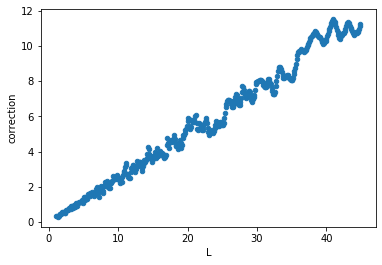

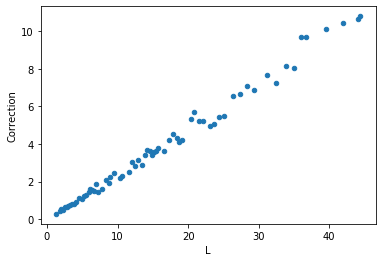

In [74]:
# plot correction vs L
df.plot(x="L",y="correction",kind="scatter")
# Sort df by L
df=df.sort_values(by="L")

def local_minimima(df):
    minima=[]
    for i in range(1,len(df)):
        if df.iloc[i-1,1]>df.iloc[i,1] and df.iloc[i,1]<df.iloc[i+1,1]:
            minima.append((df.iloc[i,0],df.iloc[i,1]))
    # df with L and minima
    df_minima=pd.DataFrame(columns=["L","Correction"])
    for i in minima:
        df_minima=df_minima.append({"L":i[0],"Correction":i[1]},ignore_index=True)
    return df_minima

df_minima=local_minimima(df)
df_minima.plot(x="L",y="Correction",kind="scatter")

In [ ]:
def mean_x(factor, values):
    return sum([cos(2*pi*v/factor) for v in values])/len(values)

def mean_y(factor, values):
    return sum([sin(2*pi*v/factor) for v in values])/len(values)

def calculatePeriodAppeal(factor, values):
    mx = mean_x(factor, values)
    my = mean_y(factor, values)
    appeal = sqrt(mx^2+my^2)
    return appeal

def calculateBestLinear(factor, values):
    mx = mean_x(factor, values).n()
    my = mean_y(factor, values).n()
    y0 = factor*atan2(my,mx)/(2*pi).n()
    err = 1-sqrt(mx^2+my^2).n()
    return [factor*x + y0, err]

def calculateGCDAppeal(factor, values):
    mx = mean_x(factor, values)
    my = mean_y(factor, values)
    appeal = 1 - sqrt((mx-1)^2+my^2)/2
    return appeal


testSeq = [399, 710, 105, 891, 402, 102, 397]
gcd = calculateGCDAppeal(x, testSeq)
find_local_maximum(gcd,90,110)
plot(gcd,(x, 10, 200), scale = "semilogx")